In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
df = pd.read_csv('Urban Air Quality and Health Impact Dataset.csv')

In [21]:
pd.set_option('display.max_columns', None)  # or set a specific number
df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,0.000,5.0,0.00,NaN,0.0,0.0,26.3,13.7,107.3,1009.2,25.0,10.0,261.4,22.5,9.0,10.0,06:06:50,1.725714e+09,18:44:53,1.725760e+09,0.16,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['KSDL', 'KDVT', 'AZM15', 'KPHX']",comb,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,0.000,3.0,0.00,NaN,0.0,0.0,20.8,12.8,101.5,1008.8,13.5,10.1,293.3,25.2,9.0,10.0,06:07:30,1.725801e+09,18:43:32,1.725846e+09,0.19,Clear,Clear conditions throughout the day.,clear-day,NaN,fcst,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,0.000,0.0,0.00,NaN,0.0,0.0,18.3,10.3,90.8,1009.4,6.2,10.1,327.0,28.2,9.0,10.0,06:08:10,1.725887e+09,18:42:10,1.725933e+09,0.22,Clear,Clear conditions throughout the day.,clear-day,NaN,fcst,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,0.012,0.0,4.17,['rain'],0.0,0.0,10.5,5.4,130.1,1006.8,4.9,12.5,276.8,24.0,9.0,10.0,06:08:49,1.725974e+09,18:40:48,1.726019e+09,0.25,Clear,Clear conditions throughout the day.,clear-day,NaN,fcst,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,0.008,0.0,4.17,['rain'],0.0,0.0,15.9,8.1,201.6,1001.8,5.7,15.0,274.9,23.7,9.0,10.0,06:09:29,1.726060e+09,18:39:26,1.726105e+09,0.29,Clear,Clear conditions throughout the day.,clear-day,NaN,fcst,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [22]:
df.isnull().sum().sort_values(ascending=False)

stations             933
preciptype           622
Condition_Code       431
snowdepth             71
tempmax                0
datetime               0
feelslikemax           0
feelslikemin           0
dew                    0
feelslike              0
humidity               0
tempmin                0
temp                   0
datetimeEpoch          0
precipcover            0
precipprob             0
precip                 0
snow                   0
winddir                0
pressure               0
windgust               0
windspeed              0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunriseEpoch           0
cloudcover             0
visibility             0
sunsetEpoch            0
sunset                 0
description            0
moonphase              0
icon                   0
source                 0
City                   0
conditions             0
Temp_Range             0
Heat_Index             0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  windgust           1000 n

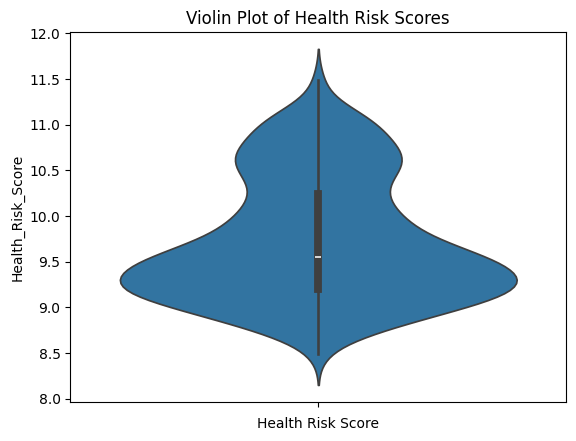

In [42]:

sns.violinplot(df['Health_Risk_Score'])
plt.title('Violin Plot of Health Risk Scores')
plt.xlabel('Health Risk Score')
plt.show()

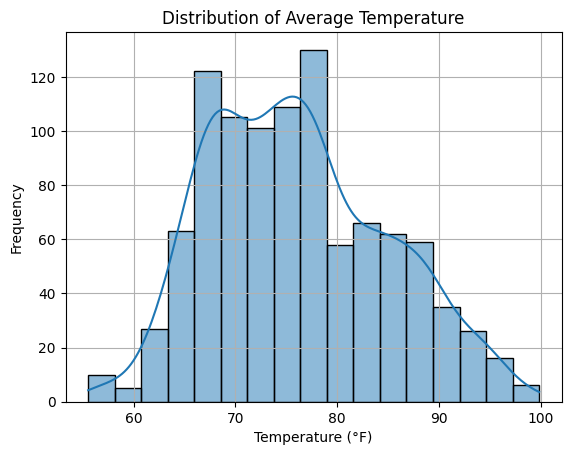

In [27]:
# Distribution of Average Temperature
sns.histplot(df['temp'], kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

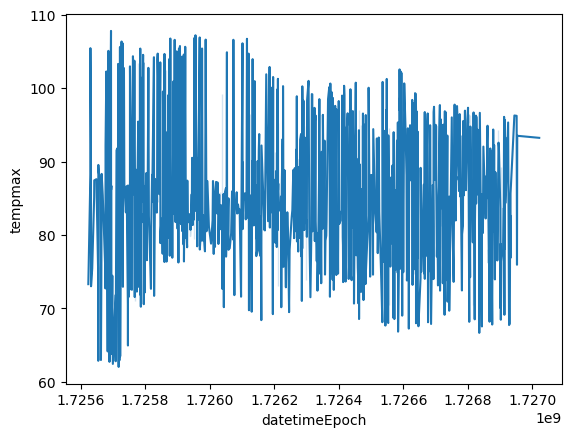

In [44]:
# Plotting 'tempmax' values
sns.lineplot(data=df, x='datetimeEpoch', y='tempmax')
plt.show()

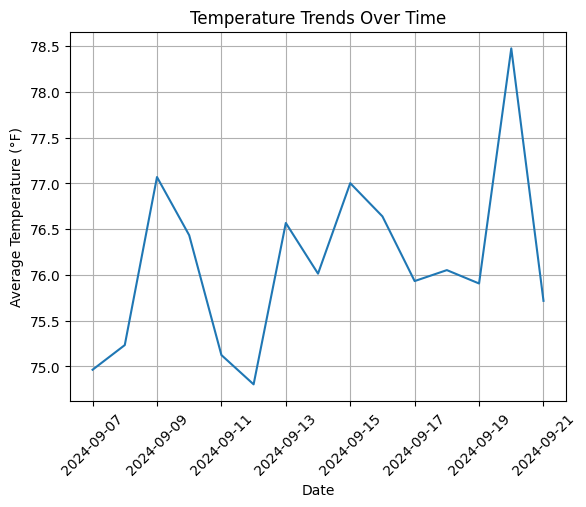

In [37]:
# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Temperature Trends Over Time
df_grouped = df.groupby(df['datetime'].dt.date).agg({'temp': 'mean'}).reset_index()  ## grouping same date time together
sns.lineplot(x='datetime', y='temp', data=df_grouped )
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.xticks(rotation=45)             ## rotate x axis texts
plt.grid(True)                      ## show grid
plt.show()

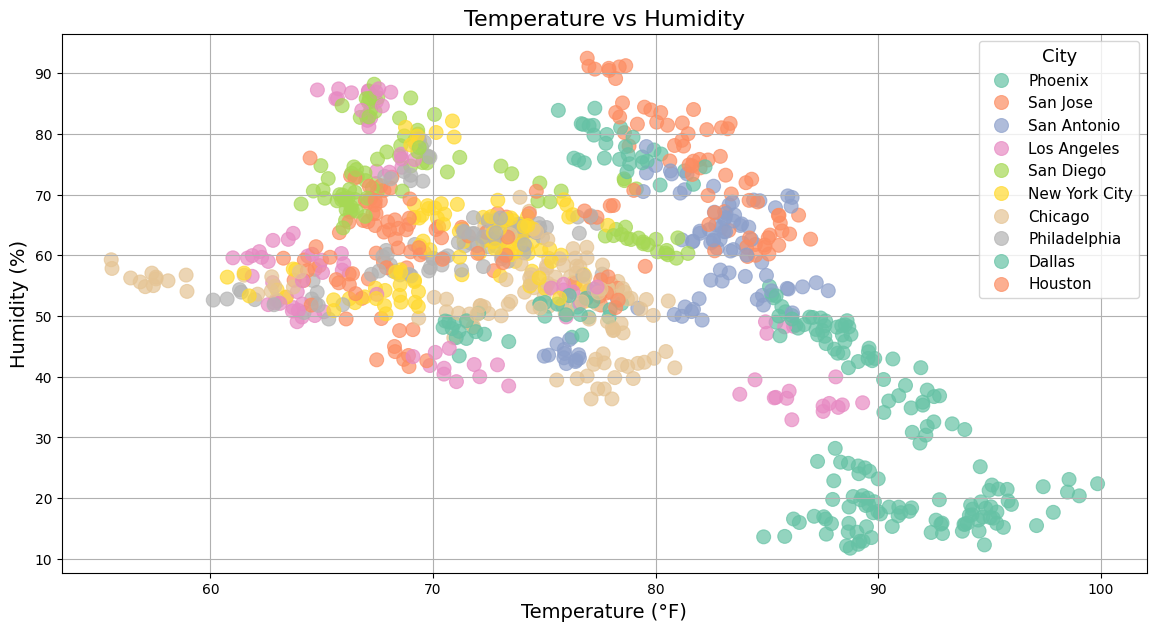

In [53]:
# Scatter Plot: Temperature vs Humidity
plt.figure(figsize=(14, 7))
sns.scatterplot(x='temp', y='humidity', hue='City', data=df, palette='Set2', alpha=0.7, s=100, edgecolor=None)
plt.title('Temperature vs Humidity', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.legend(title='City', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.show()

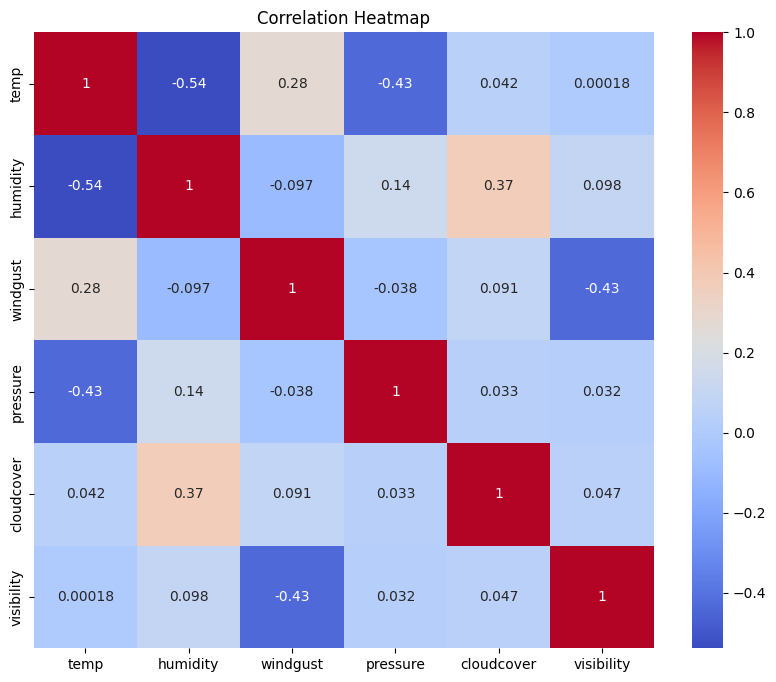

In [59]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[['temp', 'humidity', 'windgust', 'pressure', 'cloudcover', 'visibility']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()